In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/archive_.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/tmp"

dap_multiplexer.2d3ac698de06.root.log.INFO.20220215-035131.52
dap_multiplexer.INFO
debugger_1rxabcbe6n
directoryprefetcher_binary.2d3ac698de06.root.log.INFO.20220215-035214.241
directoryprefetcher_binary.INFO
drivefs_ipc.0
drivefs_ipc.0_shell
initgoogle_syslog_dir.0
pyright-249-2B0CnYzjg4Q8
pyright-249-EYX9CP9O6k2D
python-languageserver-cancellation
tmpzhh4peny


In [ ]:
import pandas as pd
train_data=pd.read_csv("/tmp/train_data_version1.csv")
train_data2=pd.read_csv("/tmp/train_data_version2.csv")


In [ ]:
pd.set_option("max_colwidth",-1)
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,text,y
0,oh why dear johnny boy part one again do you want a fucking fight what the shit is your problem ooh he s personally attacking me grow up,2.08
1,savant13 is a fat shite,3.58
2,i am english i am i do not want to get blocked again fu k,0.80
3,and why the fuck should i care g e t r i d o f a l l i d i d p l e a s e j a ck a s s,4.58
4,yo dear sir james paul you a fruity ass nigga get a life man unless your happy with editing wikipedia as your profession feel bad for you its probably hard livin life without any friends,2.08


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47991 entries, 0 to 47990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    47991 non-null  object 
 1   y       47991 non-null  float64
dtypes: float64(1), object(1)
memory usage: 750.0+ KB


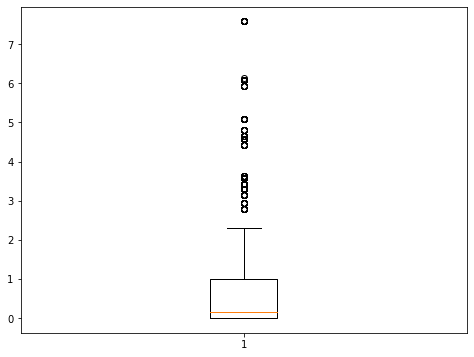

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.boxplot(train_data2["y"])
plt.show()

In [ ]:
train_data2.y.quantile([0.25,0.5,0.75])

0.25    0.00
0.50    0.16
0.75    1.00
Name: y, dtype: float64

In [ ]:
len(train_data2[(train_data2["y"]>1)])

6289

In [ ]:
import numpy as np
train_data2["not-toxic"]=np.where((train_data2["y"]==0),1,0)
train_data2["legerly-toxic"]=np.where(((train_data2["y"]>0.1) &(train_data2["y"]<=1)),1,0)
train_data2["toxic"]=np.where((train_data2["y"]>1),1,0)


In [ ]:
train_data2.drop("y",axis=1,inplace=True)

In [ ]:
train_data2[["not-toxic","legerly-toxic"]].head()

,not-toxic,legerly-toxic
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train_data2["not-toxic"]=np.where((train_data2["y"]==0),1,0)
train_txt,test_txt,train_labels,test_labels=train_test_split(train_data2["text"],train_data2[["not-toxic","legerly-toxic","toxic"]],test_size=0.2,random_state=42)
train_txt,val_txt,train_labels,val_labels=train_test_split(train_txt,train_labels,test_size=0.2,random_state=42)

In [ ]:
len(train_labels)

30713

In [ ]:
!ls "/tmp"

dap_multiplexer.03ed51f71b16.root.log.INFO.20220213-155754.53
dap_multiplexer.INFO
debugger_1z1zgsuoer
directoryprefetcher_binary.03ed51f71b16.root.log.INFO.20220213-160344.251
directoryprefetcher_binary.INFO
drivefs_ipc.0
drivefs_ipc.0_shell
FastText-jigsaw-100D
FastText-jigsaw-256D
initgoogle_syslog_dir.0
pyright-1147-IgdoMjXRsagd
pyright-1147-uP0VXppa55zb
pyright-1239-izUJhzLu04qB
pyright-1239-KG6kaeTBZlWy
pyright-1279-9o7x5BtTejij
pyright-1279-Ko7yYUWJBhzE
pyright-1589-I9g7wxO4y8BW
pyright-1589-mI6h9jNhxBu9
pyright-261-aWf7w2bEkOir
pyright-261-OioknCWjs58O
python-languageserver-cancellation
tmpxnimdo4q
train_data_version1.csv
train_data_version2.csv


In [ ]:
#!pip install fastText
import pickle
from gensim.models import FastText as ft
#model=ft.load_fasttext_format("/tmp/FastText-jigsaw-256D/Jigsaw-Fasttext-Word-Embeddings-256D.bin")
#mod=pickle.load(open("/tmp/FastText-jigsaw-256D/Jigsaw-Fasttext-Word-Embeddings-256D.bin","rb"))

In [ ]:
import numpy as np
syn1neg=np.load("/tmp/FastText-jigsaw-256D/Jigsaw-Fasttext-Word-Embeddings-256D.bin.syn1neg.npy")
n_grams=np.load("/tmp/FastText-jigsaw-256D/Jigsaw-Fasttext-Word-Embeddings-256D.bin.wv.vectors_ngrams.npy")
vocab=np.load("/tmp/FastText-jigsaw-256D/Jigsaw-Fasttext-Word-Embeddings-256D.bin.wv.vectors_vocab.npy")

In [ ]:
import re
from tqdm import tqdm
 
import nltk
 
from gensim.models.fasttext import FastText
 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
en_stop = set(stopwords.words('english'))
def process_text(document):
        document = document.lower()
 
        # Word tokenization       
        tokens = document.split()
        
        lemma_txt = [stemmer.lemmatize(word) for word in tokens]
        lemma_no_stop_txt = [word for word in lemma_txt ]
        # Drop words 
        tokens = [word for word in tokens if len(word) > 2]
                 
        clean_txt = ' '.join(lemma_no_stop_txt)

        return clean_txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')
clean_corpus = [process_text(sentence) for sentence in list(train_data2["text"]) if sentence.strip() !='']
 
word_tokenizer = nltk.WordPunctTokenizer()
word_tokens = [word_tokenizer.tokenize(sent) for sent in clean_corpus]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(len(word_tokens))

47991


In [ ]:
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2
fast_Text_model = FastText(word_tokens,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 4,
                      sg=0,
                     )

In [ ]:
from gensim.models import Word2Vec
fast_Text_model.save("/tmp/FastText-jigsaw-256D/Jigsaw-Fasttext-Word-Embeddings-256D.bin.wv.vectors_ngrams.npy")
fast_Text_model = Word2Vec.load("/tmp/FastText-jigsaw-256D/Jigsaw-Fasttext-Word-Embeddings-256D.bin.wv.vectors_ngrams.npy")


In [ ]:
fast_Text_model.wv.most_similar("weed",topn=10)

[('dillweed', 0.9486225843429565),
 ('bleed', 0.9441680908203125),
 ('shadeed', 0.9424479603767395),
 ('breed', 0.9369940161705017),
 ('saeed', 0.9354771971702576),
 ('heed', 0.9325464963912964),
 ('payed', 0.9303138256072998),
 ('hooded', 0.9302549362182617),
 ('deed', 0.929636538028717),
 ('trapped', 0.9291099309921265)]

In [ ]:
fast_Text_model.wv.similarity('beer', 'shit')

0.47814238

In [ ]:
def tsne_plot(for_word, w2v_model):
    # trained fastText model dimention
    dim_size = w2v_model.wv.vectors.shape[1]
 
    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']
 
    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)
 
    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)
 
    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('yellow')
        arrays = np.append(arrays, wrd_vector, axis=0)
 
    #---------------------- Apply PCA and tsne to reduce dimention --------------
 
    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)
 
    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)
 
    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})
 
    #------------------------- tsne plot <a href="https://thinkinfi.com/learn-python/" data-internallinksmanager029f6b8e52c="13" title="Best way to learn Python" target="_blank" rel="noopener">Python</a> -----------------------------------
 
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )
 
    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)
 
 
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
 
    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


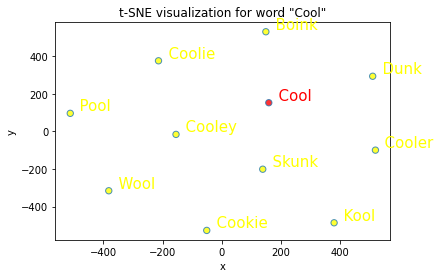

In [ ]:
tsne_plot(for_word='cool', w2v_model=fast_Text_model)

In [ ]:
train_labels.values

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
x_tr, y_tr = train_txt.values, train_labels.values
valx_tr,valy_tr=val_txt.values,val_labels.values
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(x_tr))

#converting text into integer sequences
x_tr_seq  = tokenizer.texts_to_sequences(x_tr) 
valx_tr_seq=tokenizer.texts_to_sequences(valx_tr)
#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=100)
valx_tr_seq=pad_sequences(valx_tr_seq,maxlen=100)

In [ ]:
size_of_vocabulary=len(tokenizer.word_index.items())+1
size_of_vocabulary

56441

In [ ]:
!pip install fasttext
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')

     |████████████████████████████████| 68 kB 3.1 MB/s 
  Using cached pybind11-2.9.1-py2.py3-none-any.whl (211 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3136534 sha256=41731f30041d4e9d043a60ba3f9dcd0843452ca5e83c6f7a0bd192d018289993
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext



In [ ]:
p=ft.get_word_vector("cool")
p

array([ 8.42441320e-02, -8.88189003e-02,  2.64060758e-02,  9.52542946e-02,
        9.85867232e-02, -3.99173647e-02,  9.31335613e-02,  5.42454049e-02,
        4.66257259e-02,  1.67041402e-02, -8.40709060e-02, -5.99091165e-02,
        5.44280857e-02,  2.96332128e-02,  1.32631332e-01,  1.12358732e-02,
        6.83498234e-02,  4.18557823e-02, -1.87694537e-03, -2.68467721e-02,
        9.80868936e-02,  2.76707765e-02,  1.28116785e-02,  9.80819762e-02,
        2.49836519e-02, -9.40877125e-02, -2.80425400e-02,  5.12670493e-03,
       -6.21646345e-02,  7.32920393e-02, -2.08478328e-02,  8.96402225e-02,
        2.66227406e-02,  1.14102386e-01,  1.11309342e-01,  7.18250591e-03,
       -4.77443337e-02, -4.59146611e-02,  2.29837596e-02,  6.09185547e-02,
        1.59296375e-02, -7.98630237e-04,  2.55459547e-02, -3.43347224e-03,
       -4.73411232e-02,  3.35926302e-02, -1.32296920e-01, -1.07610524e-02,
        2.05902047e-02,  3.82151678e-02,  4.88821939e-02,  1.36480659e-01,
        1.30984588e-02,  

In [ ]:
p.shape

(300,)

In [ ]:
embedding_matrix = np.zeros((size_of_vocabulary, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = ft.get_word_vector(word)
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.05174419,  0.07396396, -0.01305688, ...,  0.23702517,
         0.00044752, -0.00419307],
       [ 0.10789153, -0.04412316,  0.13406183, ...,  0.36439934,
        -0.06356798, -0.16363572],
       ...,
       [-0.01649131, -0.06892695, -0.03891736, ...,  0.02392786,
        -0.03517787, -0.01490562],
       [-0.02640492,  0.03592947,  0.04906138, ...,  0.02660646,
        -0.0058893 , -0.04097807],
       [-0.02743126,  0.02274621, -0.05070389, ..., -0.00159225,
         0.03681525,  0.02502523]])

In [ ]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *
model=Sequential()
model.add(Embedding(input_dim=size_of_vocabulary,output_dim=300,weights=[embedding_matrix],input_length=100,trainable=False))
model.add(LSTM(256,return_sequences=True,dropout=0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          16932300  
                                                                 
 lstm (LSTM)                 (None, 100, 256)          570368    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                      

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
history=model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=12,validation_data=(np.array(valx_tr_seq),np.array(valy_tr)),verbose=1,callbacks=[es,mc])

Epoch 1/12
240/240 [==============================] - ETA: 0s - loss: 0.3761 - acc: 0.7368
Epoch 00001: val_acc improved from -inf to 0.78461, saving model to best_model.h5
240/240 [==============================] - 296s 1s/step - loss: 0.3761 - acc: 0.7368 - val_loss: 0.3087 - val_acc: 0.7846
Epoch 2/12
240/240 [==============================] - ETA: 0s - loss: 0.3045 - acc: 0.7858
Epoch 00002: val_acc improved from 0.78461 to 0.79411, saving model to best_model.h5
240/240 [==============================] - 291s 1s/step - loss: 0.3045 - acc: 0.7858 - val_loss: 0.2895 - val_acc: 0.7941
Epoch 3/12
240/240 [==============================] - ETA: 0s - loss: 0.2833 - acc: 0.7975
Epoch 00003: val_acc improved from 0.79411 to 0.80440, saving model to best_model.h5
240/240 [==============================] - 283s 1s/step - loss: 0.2833 - acc: 0.7975 - val_loss: 0.2746 - val_acc: 0.8044
Epoch 4/12
240/240 [==============================] - ETA: 0s - loss: 0.2692 - acc: 0.8070
Epoch 00004: val_a

In [ ]:
x_test_tr, y_test_tr = test_txt.values, test_labels.values

x_test_tr_seq  = tokenizer.texts_to_sequences(x_test_tr) 
#padding to prepare sequences of same length
x_test_tr_seq  = pad_sequences(x_test_tr_seq, maxlen=100)

model_=load_model("best_model.h5")
model_.evaluate(x_test_tr_seq,y_test_tr)

300/300 [==============================] - 45s 147ms/step - loss: 0.2633 - acc: 0.8131


[0.2632766664028168, 0.8131055235862732]

In [ ]:
model_.evaluate(x_test_tr_seq,y_test_tr)

300/300 [==============================] - 21s 62ms/step - loss: 0.2608 - acc: 0.8169


[0.260800838470459, 0.8168559074401855]

In [ ]:
nltk.download('wordnet')
clean_corpus = [sentence for sentence in list(train_data2["text"]) if sentence.strip() !='']
 
word_tokenizer = nltk.WordPunctTokenizer()
word_tokens = [word_tokenizer.tokenize(sent) for sent in clean_corpus]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


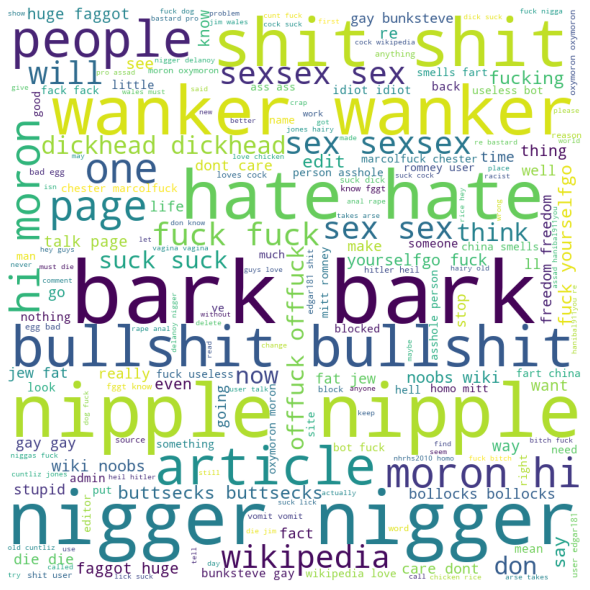

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
train_data2=pd.read_csv("/tmp/train_data_version2.csv")
toxic_words=train_data2[(train_data2["y"]>0) & (train_data2["y"]<=1)].text
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(''.join(toxic_words))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
train_data2=pd.read_csv("/tmp/train_data_version2.csv")
train_data2["y"]=np.where((train_data2["y"]==0),0,1)
print(train_data2["y"].value_counts())
train_txt,test_txt,train_labels,test_labels=train_test_split(train_data2["text"],train_data2["y"],test_size=0.2,random_state=42)
train_txt,val_txt,train_labels,val_labels=train_test_split(train_txt,train_labels,test_size=0.2,random_state=42)
x_tr, y_tr = train_txt.values, train_labels.values
valx_tr,valy_tr=val_txt.values,val_labels.values
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(x_tr))

#converting text into integer sequences
x_tr_seq  = tokenizer.texts_to_sequences(x_tr) 
valx_tr_seq=tokenizer.texts_to_sequences(valx_tr)
#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=100)
valx_tr_seq=pad_sequences(valx_tr_seq,maxlen=100)
size_of_vocabulary=len(tokenizer.word_index.items())+1
embedding_matrix = np.zeros((size_of_vocabulary, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = ft.get_word_vector(word)
    embedding_matrix[i] = embedding_vector
model=Sequential()
model.add(Embedding(input_dim=size_of_vocabulary,output_dim=300,weights=[embedding_matrix],input_length=100,trainable=False))
model.add(LSTM(128,return_sequences=True,dropout=0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid")) 
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])   
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
history=model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=12,validation_data=(np.array(valx_tr_seq),np.array(valy_tr)),verbose=1,callbacks=[es,mc])    

1    23996
0    23995
Name: y, dtype: int64
Epoch 1/12
240/240 [==============================] - ETA: 0s - loss: 0.3326 - acc: 0.8561
Epoch 00001: val_acc improved from -inf to 0.91119, saving model to best_model.h5
240/240 [==============================] - 124s 506ms/step - loss: 0.3326 - acc: 0.8561 - val_loss: 0.2178 - val_acc: 0.9112
Epoch 2/12
240/240 [==============================] - ETA: 0s - loss: 0.2230 - acc: 0.9082
Epoch 00002: val_acc improved from 0.91119 to 0.92421, saving model to best_model.h5
240/240 [==============================] - 122s 509ms/step - loss: 0.2230 - acc: 0.9082 - val_loss: 0.1931 - val_acc: 0.9242
Epoch 3/12
240/240 [==============================] - ETA: 0s - loss: 0.1960 - acc: 0.9214
Epoch 00003: val_acc improved from 0.92421 to 0.92707, saving model to best_model.h5
240/240 [==============================] - 121s 504ms/step - loss: 0.1960 - acc: 0.9214 - val_loss: 0.1793 - val_acc: 0.9271
Epoch 4/12
240/240 [==============================] - ET

In [ ]:
x_test_tr, y_test_tr = test_txt.values, test_labels.values

x_test_tr_seq  = tokenizer.texts_to_sequences(x_test_tr) 
#padding to prepare sequences of same length
x_test_tr_seq  = pad_sequences(x_test_tr_seq, maxlen=100)

model=load_model("best_model.h5")
model.evaluate(x_test_tr_seq,y_test_tr)

300/300 [==============================] - 20s 65ms/step - loss: 0.1706 - acc: 0.9387


[0.17058484256267548, 0.9387435913085938]

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 300)          16932300  
                                                                 
 lstm_7 (LSTM)               (None, 100, 128)          219648    
                                                                 
 global_max_pooling1d_7 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_19 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                      

In [ ]:
pred=model.predict(np.array(x_test_tr_seq),batch_size=128)
classes_x=np.argmax(pred,axis=1)

array([[0.9999981 ],
       [0.00105065],
       [0.00617692],
       ...,
       [0.9998722 ],
       [0.03893757],
       [0.9966669 ]], dtype=float32)

In [ ]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
train_data2_=pd.read_csv("/tmp/train_data_version2.csv")
#train_data2["y"]=np.where((train_data2["y"]==0),0,1)
#print(train_data2["y"].value_counts())
u=train_data2_["y"].mean()
s=train_data2_["y"].std()
train_data2=train_data2_[(train_data2_["y"]>u-2*s) & (train_data2_["y"]<u+2*s)]
train_txt,test_txt,train_labels,test_labels=train_test_split(train_data2["text"],train_data2["y"],test_size=0.2,random_state=42)
train_txt,val_txt,train_labels,val_labels=train_test_split(train_txt,train_labels,test_size=0.2,random_state=42)
x_tr, y_tr = train_txt.values, train_labels.values
valx_tr,valy_tr=val_txt.values,val_labels.values
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(x_tr))

#converting text into integer sequences
x_tr_seq  = tokenizer.texts_to_sequences(x_tr) 
valx_tr_seq=tokenizer.texts_to_sequences(valx_tr)
#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=100)
valx_tr_seq=pad_sequences(valx_tr_seq,maxlen=100)
size_of_vocabulary=len(tokenizer.word_index.items())+1
embedding_matrix = np.zeros((size_of_vocabulary, 300))

for word, i in tokenizer.word_index.items():
    embedding_vector = ft.get_word_vector(word)
    embedding_matrix[i] = embedding_vector
model=Sequential()
model.add(Embedding(input_dim=size_of_vocabulary,output_dim=300,weights=[embedding_matrix],input_length=100,trainable=False))
model.add(LSTM(128,return_sequences=True,dropout=0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="linear")) 
model.compile(optimizer="adam",loss=MeanSquaredLogarithmicError(),metrics=[MeanSquaredLogarithmicError()])   
es = EarlyStopping(monitor='val_loss', mode='max', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='max', save_best_only=True,verbose=1)  
  
history=model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=6,validation_data=(np.array(valx_tr_seq),np.array(valy_tr)),verbose=1,callbacks=[es,mc])    

Epoch 1/6
231/231 [==============================] - ETA: 0s - loss: 0.0712 - mean_squared_logarithmic_error: 0.0712
Epoch 00001: val_loss improved from -inf to 0.04783, saving model to best_model.h5
231/231 [==============================] - 123s 520ms/step - loss: 0.0712 - mean_squared_logarithmic_error: 0.0712 - val_loss: 0.0478 - val_mean_squared_logarithmic_error: 0.0478
Epoch 2/6
231/231 [==============================] - ETA: 0s - loss: 0.0485 - mean_squared_logarithmic_error: 0.0484
Epoch 00002: val_loss did not improve from 0.04783
231/231 [==============================] - 115s 498ms/step - loss: 0.0485 - mean_squared_logarithmic_error: 0.0484 - val_loss: 0.0456 - val_mean_squared_logarithmic_error: 0.0456
Epoch 3/6
231/231 [==============================] - ETA: 0s - loss: 0.0440 - mean_squared_logarithmic_error: 0.0441
Epoch 00003: val_loss did not improve from 0.04783
231/231 [==============================] - 115s 496ms/step - loss: 0.0440 - mean_squared_logarithmic_error

In [ ]:
x_test_tr, y_test_tr = test_txt.values, test_labels.values

x_test_tr_seq  = tokenizer.texts_to_sequences(x_test_tr) 
#padding to prepare sequences of same length
x_test_tr_seq  = pad_sequences(x_test_tr_seq, maxlen=100)

#model_=load_model("best_model.h5",compile=False)
model.evaluate(x_test_tr_seq,y_test_tr)

288/288 [==============================] - 32s 112ms/step - loss: 0.0425 - mean_squared_logarithmic_error: 0.0425


[0.042471710592508316, 0.04247383773326874]

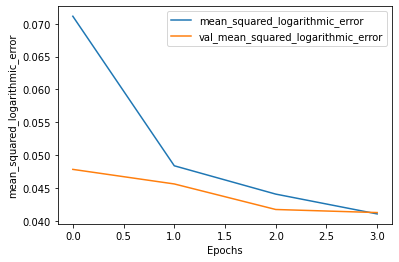

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
x=train_data2.iloc[:5].text
x

,text,y
0,oh why dear johnny boy part one again do you w...,2.08
2,i am english i am i do not want to get blocked...,0.80
4,yo dear sir james paul you a fruity ass nigga ...,2.08
5,you are an ignorant bastard lmfao,2.08
6,that had more content and was going to be an a...,0.64
